# Trabalho da disciplina GCC128 - Inteligência Artificial

### Trabalho Prático 01 - Classificação KNN

Professor: Ahmed Ali Abdalla Esmin

Alunos: Thiago Lima Pereira & Gustavo de Jesus Teodoro

A ideia dessa atividade é a fixação dos conhecimentos adquiridos em sala de aula, desenvolvendo dois códigos das aplicações que simule o algoritmo KNN. O primeiro código foi feito sem o uso de bibliotecas que já possuem os algoritmos do KNN implementados por padrão, já o segundo algoritmo foi desenvolvido utilizando a biblioteca ``Sklearn`` para fins comparativos.

### Base de dados

A base de dados utilizada será a ``Base de dados Irís``, popularmente conhecida na área em razão das inúmera aplicações de algoritmos à ela

### Algoritmo desenvolvido sem o uso de bibliotecas

Nesta seção, o algoritmo KNN é implementado do zero, utilizando apenas bibliotecas básicas do Python
como `Numpy` e `Pandas` para manipulação de dados. O objetivo é demonstrar o funcionamento interno do classificador, passando pelas seguintes etapas:

- **Carregamento e Preparação dos Dados:** Leitura do dataset Iris e separação em features (X) e target (y).
- **Divisão Treino/Teste:** Uma função customizada para dividir os dados em conjuntos de treinamento e teste.
- **Cálculo da Distância:** Implementação da distância euclidiana para medir a similaridade entre os pontos.
- **Classificador KNN:** Uma classe `KNNClassifier` que encapsula a lógica de treinamento (`fit`) e predição (`predict`).
- **Funções de Avaliação:** Implementação de métricas como matriz de confusão, acurácia, precisão e revocação para avaliar o desempenho do modelo.
- **Execução e Análise:** O modelo é executado com diferentes valores de `k` (1, 3, 5 e 7) e os resultados são exibidos para análise comparativa.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.read_csv("../dataset/Iris.csv")
df = df.drop(columns=["Id"])

X = df.drop(columns=["Species"]).values
y = df["Species"].values

knn_hardcore_acc_list = []


def train_test_split(X, y, test_size=0.25, random_state=17):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split], indices[split:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_neighbor_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    
    for yt, yp in zip(y_true, y_pred):
        i, j = label_to_index[yt], label_to_index[yp]
        matrix[i][j] += 1
    return matrix

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_recall(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels)
    precisions, recalls = {}, {}
    for i, label in enumerate(labels):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        precisions[label] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recalls[label] = tp / (tp + fn) if (tp + fn) > 0 else 0
    return precisions, recalls

def run_knn_hardcore(k):
    labels = np.unique(y)
    print(f"\n--- Resultados para k = {k} ---")
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy(y_test, y_pred)
    knn_hardcore_acc_list.append(acc * 100)
    cm = confusion_matrix(y_test, y_pred, labels)
    precisions, recalls = precision_recall(y_test, y_pred, labels)

    print("Taxa de reconhecimento (Acurácia):", round(acc, 4))
    print("Matriz de confusão:\n", cm)
    print("Precisão por classe:", precisions)
    print("Revocação por classe:", recalls)

    print("F1-Score por classe:", {label: 2 * (precisions[label] * recalls[label]) / (precisions[label] + recalls[label]) for label in labels})


for k in [1, 3, 5, 7]:
    run_knn_hardcore(k)



--- Resultados para k = 1 ---
Taxa de reconhecimento (Acurácia): 0.9474
Matriz de confusão:
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]
Precisão por classe: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.9090909090909091), 'Iris-virginica': np.float64(0.9090909090909091)}
Revocação por classe: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.9090909090909091), 'Iris-virginica': np.float64(0.9090909090909091)}
F1-Score por classe: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.9090909090909091), 'Iris-virginica': np.float64(0.9090909090909091)}

--- Resultados para k = 3 ---
Taxa de reconhecimento (Acurácia): 0.9474
Matriz de confusão:
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]
Precisão por classe: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.9090909090909091), 'Iris-virginica': np.float64(0.9090909090909091)}
Revocação por classe: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.9090909090909091), 'Iris-virgi

### Algoritmo desenvolvido com a biblioteca Sklearn

Nesta seção, o problema de classificação é resolvido utilizando a biblioteca `scikit-learn` (`sklearn`), que oferece uma implementação otimizada e robusta do KNN. O objetivo é comparar a simplicidade e a eficiência do uso de uma biblioteca especializada em relação à implementação manual.

O código realiza as seguintes etapas:

- **Importação das Ferramentas:** Carrega as funções e classes necessárias do `sklearn`, como `train_test_split`, `KNeighborsClassifier` e métricas de avaliação.
- **Carregamento e Divisão dos Dados:** O dataset Iris é novamente carregado e dividido em conjuntos de treino e teste. Desta vez, a função `train_test_split` do `sklearn` é utilizada, com o parâmetro `stratify=y` para garantir que a proporção de cada classe seja a mesma nos conjuntos de treino e teste.
- **Criação e Treinamento do Modelo:** Uma função `run_knn_sklearn` é definida para encapsular o processo. Dentro dela, um classificador `KNeighborsClassifier` é instanciado e treinado com os dados de treinamento usando o método `fit`.
- **Predição e Avaliação:** O modelo treinado é usado para fazer predições no conjunto de teste. Em seguida, são calculadas e exibidas as métricas de desempenho, incluindo acurácia, matriz de confusão e um relatório de classificação completo (com precisão, revocação e F1-score) gerado pela função `classification_report`.
- **Execução Comparativa:** Assim como na abordagem manual, o modelo é executado para `k` igual a 1, 3, 5 e 7, permitindo uma comparação direta de desempenho entre as duas implementações.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Carregar dataset ---
df = pd.read_csv("../dataset/Iris.csv")
df = df.drop(columns=["Id"])

X = df.drop(columns=["Species"]).values
y = df["Species"].values

knn_sklearn_acc_list = []

# --- Dividir treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17, stratify=y
)

# --- Função principal para rodar sklearn KNN com qualquer k ---
def run_knn_sklearn(k):
    print(f"\n--- Resultados com sklearn | k = {k} ---")
    
    # Criar e treinar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predições
    y_pred = knn.predict(X_test)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    knn_sklearn_acc_list.append(acc * 100)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    print("Taxa de reconhecimento (Acurácia):", round(acc, 4))
    print("Matriz de confusão:\n", cm)
    print("Relatório de classificação:\n", report)

for k in [1, 3, 5, 7]:
    run_knn_sklearn(k)


--- Resultados com sklearn | k = 1 ---
Taxa de reconhecimento (Acurácia): 0.9737
Matriz de confusão:
 [[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Relatório de classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38


--- Resultados com sklearn | k = 3 ---
Taxa de reconhecimento (Acurácia): 0.9474
Matriz de confusão:
 [[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
Relatório de classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy               

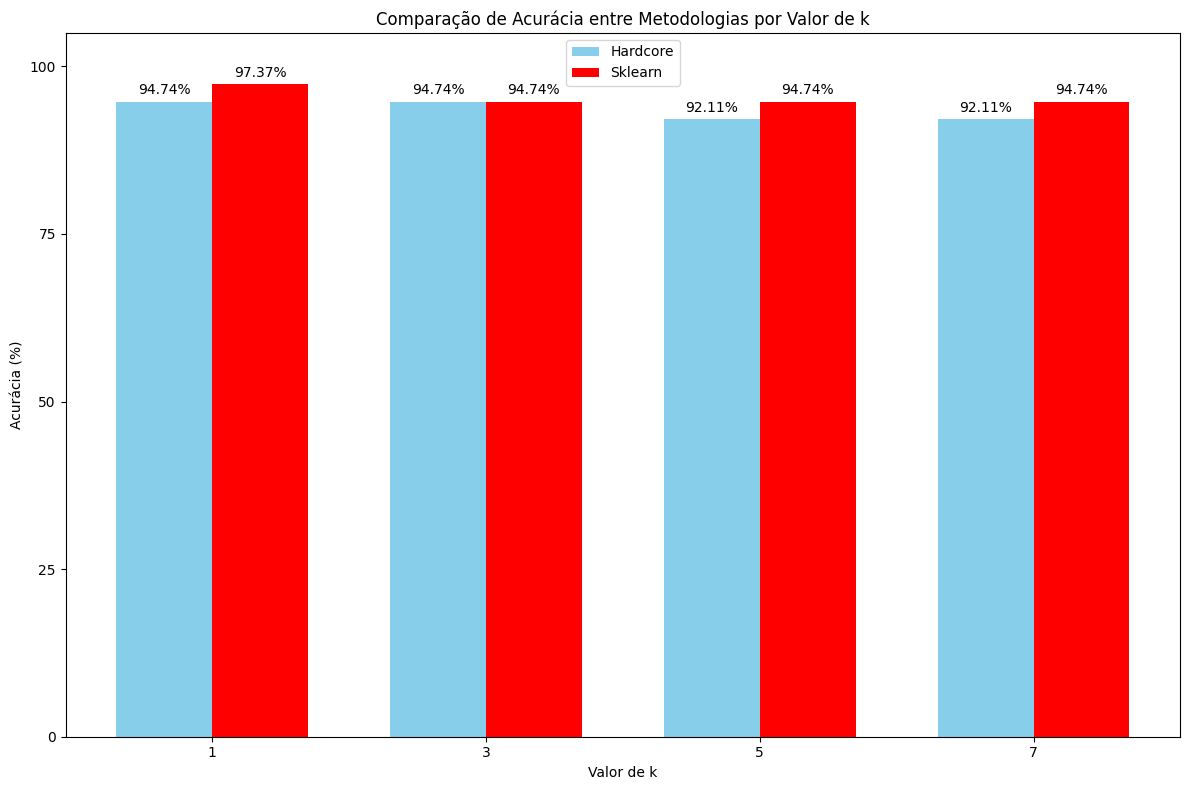

In [4]:
import numpy as np

import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7]

# Preparar dados para o gráfico
x = np.arange(4)
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, knn_hardcore_acc_list, width, label='Hardcore', color='skyblue')
rects2 = ax.bar(x + width/2, knn_sklearn_acc_list, width, label='Sklearn', color='red')

# Adicionar títulos e rótulos
ax.set_ylabel('Acurácia (%)')
ax.set_xlabel('Valor de k')
ax.set_title('Comparação de Acurácia entre Metodologias por Valor de k')
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.legend()

# Definir a escala do eixo y
ax.set_ylim(0, 105)
ax.set_yticks(np.arange(0, 101, 25))

# Adicionar o valor da acurácia no topo de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()